In [1]:
# pacotes usados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline



In [2]:
#importando os dados
micro_Enem = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=";", encoding='ISO-8859-1')
micro_Enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [3]:
#selecionando os dados de interesse
micro_Enem_selecionados = micro_Enem.drop(["NU_INSCRICAO","NU_ANO", "CO_MUNICIPIO_NASCIMENTO", "CO_UF_NASCIMENTO", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", "IN_NOME_SOCIAL", "CO_MUNICIPIO_PROVA", "CO_UF_PROVA", "Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019", "Q020", "Q021", "Q022", "Q023", "Q024", "Q025", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT", "NO_MUNICIPIO_PROVA", "CO_MUNICIPIO_PROVA", "CO_UF_PROVA", "SG_UF_PROVA", "CO_PROVA_CN", "CO_PROVA_CH", "CO_PROVA_LC", "CO_PROVA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "TP_LOCALIZACAO_ESC","TP_SIT_FUNC_ESC", "TP_STATUS_REDACAO", "NO_MUNICIPIO_NASCIMENTO", "SG_UF_NASCIMENTO", "CO_MUNICIPIO_RESIDENCIA", "NO_MUNICIPIO_RESIDENCIA", "CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC"], axis=1)

In [4]:
micro_Enem_selecionados.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO
0,15,PA,21,M,1,3,4,1,3,1,...,1,1,1,1,472.9,466.0,497.3,369.1,0,780.0
1,15,PA,16,F,1,3,1,3,0,1,...,1,1,1,1,358.9,495.4,482.3,416.5,1,600.0
2,15,PA,18,F,1,1,1,2,0,3,...,1,1,1,1,574.2,538.7,582.6,571.5,0,640.0
3,15,PA,23,M,0,3,1,2,0,2,...,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN
4,15,PA,23,M,1,3,1,1,5,1,...,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN


In [5]:
print("Número de observacoes na base de dados: ", micro_Enem_selecionados.shape[0])

Número de observacoes na base de dados:  5095270


In [6]:
#identificando dados faltantes nas variáveis selecionadas

for column_name, item in micro_Enem_selecionados.iteritems():
    print('Coluna/atributo:', column_name)
    print('\tPossui faltantes?', item.isna().any())

Coluna/atributo: CO_UF_RESIDENCIA
	Possui faltantes? False
Coluna/atributo: SG_UF_RESIDENCIA
	Possui faltantes? False
Coluna/atributo: NU_IDADE
	Possui faltantes? False
Coluna/atributo: TP_SEXO
	Possui faltantes? False
Coluna/atributo: TP_ESTADO_CIVIL
	Possui faltantes? False
Coluna/atributo: TP_COR_RACA
	Possui faltantes? False
Coluna/atributo: TP_NACIONALIDADE
	Possui faltantes? False
Coluna/atributo: TP_ST_CONCLUSAO
	Possui faltantes? False
Coluna/atributo: TP_ANO_CONCLUIU
	Possui faltantes? False
Coluna/atributo: TP_ESCOLA
	Possui faltantes? False
Coluna/atributo: TP_ENSINO
	Possui faltantes? True
Coluna/atributo: IN_TREINEIRO
	Possui faltantes? False
Coluna/atributo: CO_ESCOLA
	Possui faltantes? True
Coluna/atributo: CO_UF_ESC
	Possui faltantes? True
Coluna/atributo: SG_UF_ESC
	Possui faltantes? True
Coluna/atributo: TP_DEPENDENCIA_ADM_ESC
	Possui faltantes? True
Coluna/atributo: IN_BAIXA_VISAO
	Possui faltantes? False
Coluna/atributo: IN_CEGUEIRA
	Possui faltantes? False
Coluna/a

In [7]:
micro_Enem_selecionados.isna().any()[lambda x: x]

TP_ENSINO                 True
CO_ESCOLA                 True
CO_UF_ESC                 True
SG_UF_ESC                 True
TP_DEPENDENCIA_ADM_ESC    True
NU_NOTA_CN                True
NU_NOTA_CH                True
NU_NOTA_LC                True
NU_NOTA_MT                True
NU_NOTA_REDACAO           True
dtype: bool

In [8]:
print(micro_Enem_selecionados.TP_ENSINO.isna().sum())

2217073


In [9]:
print(micro_Enem_selecionados.CO_ESCOLA.isna().sum())

3947858


In [10]:
print(micro_Enem_selecionados.CO_UF_ESC.isna().sum())

3947858


In [11]:
print(micro_Enem_selecionados.SG_UF_ESC.isna().sum())

3947858


In [12]:
print(micro_Enem_selecionados.TP_DEPENDENCIA_ADM_ESC.isna().sum())

3947858


In [13]:
print(micro_Enem_selecionados.NU_NOTA_CN.isna().sum())

1384837


In [14]:
#retirando dados faltantes referentes às notas de Ciências da Natureza

micro_Enem_selecionados.dropna(subset=['NU_NOTA_CN'], inplace=True)

In [15]:
print(micro_Enem_selecionados.NU_NOTA_CN.isna().sum())

0


In [16]:
print(micro_Enem_selecionados.NU_NOTA_CH.isna().sum())

8425


In [17]:
#retirando dados faltantes referentes às notas de Ciências Humanas

micro_Enem_selecionados.dropna(subset=['NU_NOTA_CH'], inplace=True)

In [18]:
print(micro_Enem_selecionados.NU_NOTA_CH.isna().sum())

0


In [19]:
print(micro_Enem_selecionados.NU_NOTA_LC.isna().sum())

0


In [20]:
print(micro_Enem_selecionados.NU_NOTA_MT.isna().sum())

0


In [21]:
print(micro_Enem_selecionados.NU_NOTA_REDACAO.isna().sum())

1


In [22]:
#retirando dados faltantes referentes às notas da Redação

micro_Enem_selecionados.dropna(subset=['NU_NOTA_REDACAO'], inplace=True)

In [23]:
print(micro_Enem_selecionados.NU_NOTA_REDACAO.isna().sum())

0


In [24]:
#Selecionando dados de interesse para base de dados sobre PCDs

pcds=micro_Enem_selecionados[['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'TP_SEXO', 'TP_COR_RACA', 'NU_IDADE', 'SG_UF_RESIDENCIA', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO' ]]

In [25]:
pcds.head()

,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TP_SEXO,TP_COR_RACA,NU_IDADE,SG_UF_RESIDENCIA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,0,0,0,0,0,0,0,0,0,...,M,3,21,PA,1,472.9,466.0,497.3,369.1,780.0
1,0,0,0,0,0,0,0,0,0,0,...,F,3,16,PA,1,358.9,495.4,482.3,416.5,600.0
2,0,0,0,0,0,0,0,0,0,0,...,F,1,18,PA,3,574.2,538.7,582.6,571.5,640.0
5,0,0,0,0,0,0,0,0,0,0,...,M,1,31,PA,1,522.0,592.6,582.0,605.3,580.0
6,0,0,0,0,0,0,0,0,0,0,...,F,3,30,PA,1,407.4,480.1,464.3,581.5,360.0


In [26]:
print("Número de observacoes na base de dados: ", pcds.shape[0])

Número de observacoes na base de dados:  3702007


In [27]:
#Somando os tipos diferentes de deficiências declaradas

pcds['DEFICIENCIAS'] = pcds[['IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA',
                    'IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO','IN_VISAO_MONOCULAR','IN_OUTRA_DEF']].sum(axis=1)

C:\Users\Maria Cláudia\AppData\Local\Temp\ipykernel_1748\1823264643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcds['DEFICIENCIAS'] = pcds[['IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA',


In [28]:
pcds.sort_values(by='DEFICIENCIAS', ascending=False)

,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TP_COR_RACA,NU_IDADE,SG_UF_RESIDENCIA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,DEFICIENCIAS
1289527,0,0,0,1,0,1,1,1,1,1,...,3,19,BA,3,362.9,472.8,408.0,368.8,320.0,7
4709920,1,0,0,0,0,1,1,1,0,0,...,1,17,PI,1,486.9,329.3,461.3,456.2,560.0,5
4268800,0,0,0,0,0,0,1,1,1,1,...,1,19,BA,1,397.9,433.2,450.6,392.5,680.0,5
4364649,0,0,0,0,0,1,1,1,1,1,...,1,21,MG,1,431.8,388.8,473.1,564.5,820.0,5
3371838,0,0,0,0,0,0,1,1,0,1,...,1,18,ES,3,413.7,357.5,446.7,473.8,360.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631271,0,0,0,0,0,0,0,0,0,0,...,3,18,BA,2,476.5,559.1,496.6,554.5,620.0,0
1631274,0,0,0,0,0,0,0,0,0,0,...,0,18,BA,3,539.0,573.0,589.8,473.4,760.0,0
1631277,0,0,0,0,0,0,0,0,0,0,...,2,18,BA,1,428.0,393.2,446.4,450.0,480.0,0
1631281,0,0,0,0,0,0,0,0,0,0,...,3,17,BA,1,367.7,396.9,397.3,375.1,460.0,0


In [29]:
# transformando 'sexo' em binária
pcds.insert(loc = 14, column = 'TP_SEXO_2', value = np.where(pcds['TP_SEXO'] == 'F', 1, 0))
pcds.columns
pcds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702007 entries, 0 to 5095269
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IN_BAIXA_VISAO           int64  
 1   IN_CEGUEIRA              int64  
 2   IN_SURDEZ                int64  
 3   IN_DEFICIENCIA_AUDITIVA  int64  
 4   IN_SURDO_CEGUEIRA        int64  
 5   IN_DEFICIENCIA_FISICA    int64  
 6   IN_DEFICIENCIA_MENTAL    int64  
 7   IN_DEFICIT_ATENCAO       int64  
 8   IN_DISLEXIA              int64  
 9   IN_DISCALCULIA           int64  
 10  IN_AUTISMO               int64  
 11  IN_VISAO_MONOCULAR       int64  
 12  IN_OUTRA_DEF             int64  
 13  TP_SEXO                  object 
 14  TP_SEXO_2                int32  
 15  TP_COR_RACA              int64  
 16  NU_IDADE                 int64  
 17  SG_UF_RESIDENCIA         object 
 18  TP_ESCOLA                int64  
 19  NU_NOTA_CN               float64
 20  NU_NOTA_CH               float64
 21  NU_NOTA_

In [30]:
#distribuição do número de homens e mulheres dentro dos pcds

pcds.groupby('TP_SEXO_2')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
TP_SEXO_2,
0,13262
1,13916


In [31]:
#percentual da distribuição de homens e mulheres

pcds.groupby('TP_SEXO_2')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
TP_SEXO_2,
0,48.796821
1,51.203179


In [32]:
#distribuição de raças dentro dos pcds
#0=não declarado; 1=branca, 2=preta, 3=parda, 4=amarela, 5=indígena

pcds.groupby('TP_COR_RACA')[['DEFICIENCIAS']].sum()


,DEFICIENCIAS
TP_COR_RACA,
0,694
1,12362
2,2563
3,10934
4,494
5,131


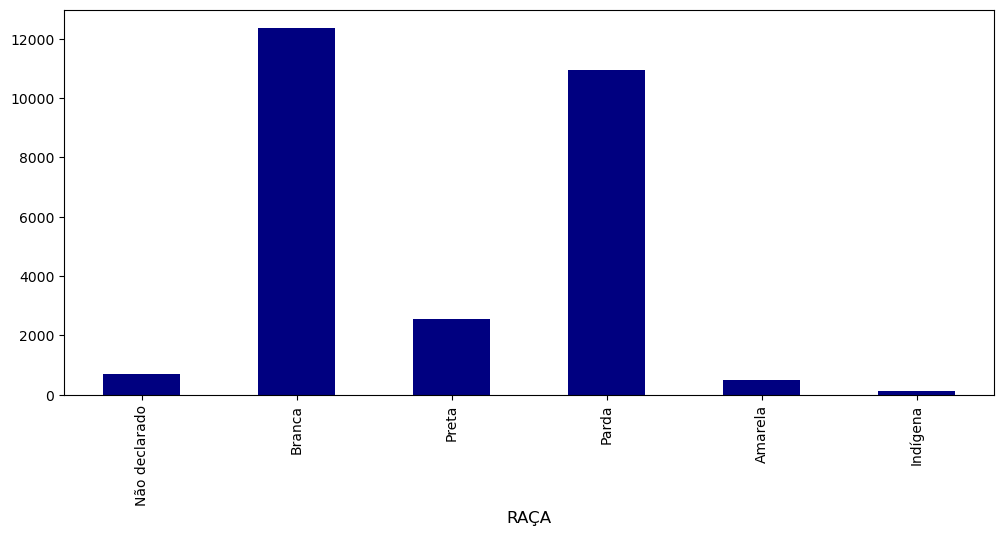

In [33]:
pcds.groupby(['TP_COR_RACA'])['DEFICIENCIAS'].sum().plot(kind = 'bar', figsize= (12, 5), color='navy');

ticks, labels = plt.xticks()
plt.xticks(ticks, labels=['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])
plt.xlabel('RAÇA', fontsize=12);


In [34]:
#percentual da distribuição de raças dentro dos pcds
#0=não declarado; 1=branca, 2=preta, 3=parda, 4=amarela, 5=indígena

pcds.groupby('TP_COR_RACA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
TP_COR_RACA,
0,2.553536
1,45.485319
2,9.430422
3,40.231069
4,1.817647
5,0.482008


In [35]:
#distribuição por idade dentro dos pcds

pcds.groupby('NU_IDADE')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
NU_IDADE,
1,0
2,0
3,0
4,0
5,0
...,...
85,0
86,0
88,0


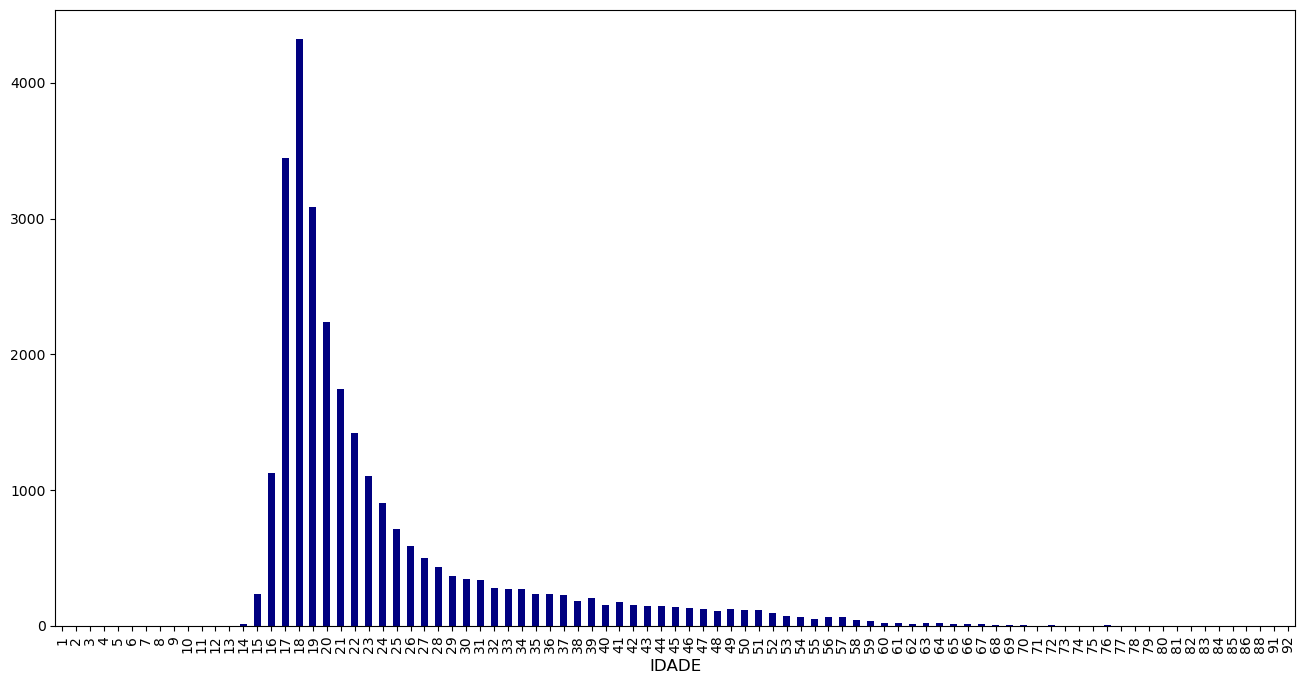

In [36]:
pcds.groupby(['NU_IDADE'])['DEFICIENCIAS'].sum().plot(kind = 'bar', figsize= (16, 8), color='navy')
plt.xlabel('IDADE', fontsize=12);

In [37]:
#distribuição dos pcds por Unidade da Federação

pcds.groupby('SG_UF_RESIDENCIA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
SG_UF_RESIDENCIA,
AC,243
AL,422
AM,318
AP,193
BA,1698
CE,1655
DF,798
ES,728
GO,1188


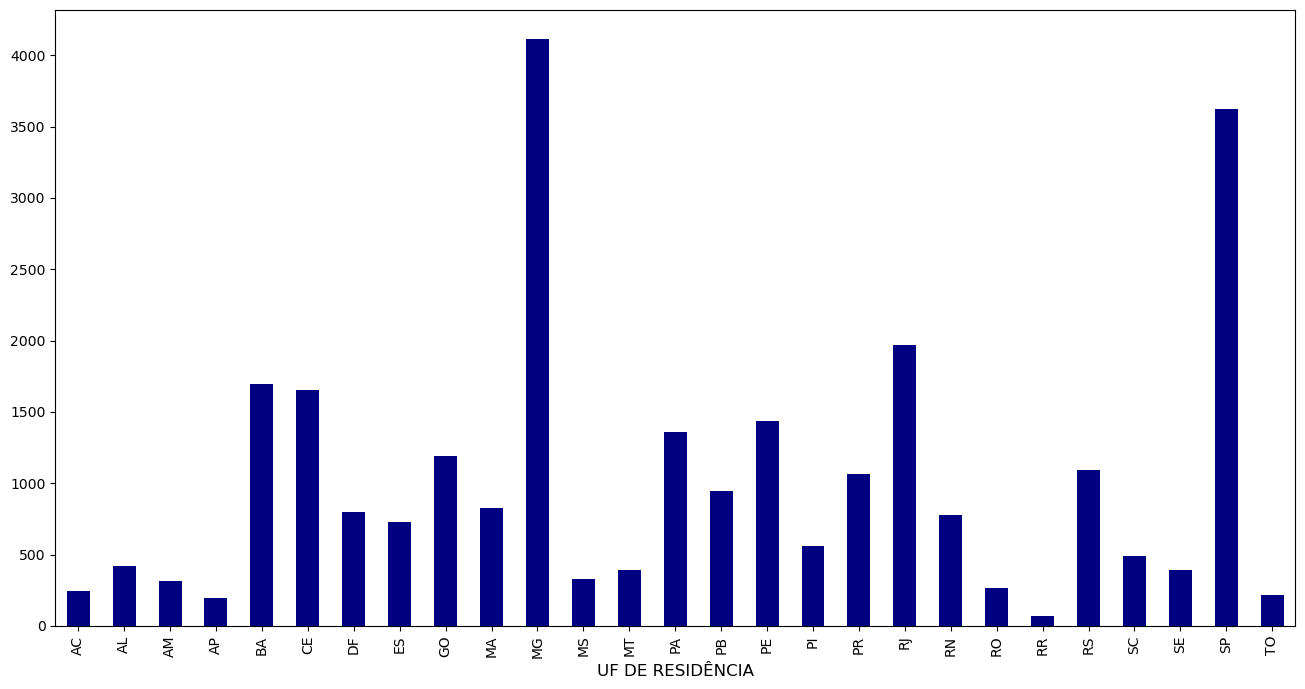

In [38]:
pcds.groupby(['SG_UF_RESIDENCIA'])['DEFICIENCIAS'].sum().plot(kind = 'bar', figsize= (16, 8), color='navy')
plt.xlabel('UF DE RESIDÊNCIA', fontsize=12);

In [39]:
#percentual da distribuição de pcds por unidade da federação

pcds.groupby('SG_UF_RESIDENCIA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
SG_UF_RESIDENCIA,
AC,0.894106
AL,1.552726
AM,1.170064
AP,0.710133
BA,6.247700
CE,6.089484
DF,2.936198
ES,2.678637
GO,4.371183


In [40]:
#distribuição de pcds por tipo de escola
#1=não respondeu, 2=pública, 3=privada

pcds.groupby('TP_ESCOLA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
TP_ESCOLA,
1,18604
2,5462
3,3112


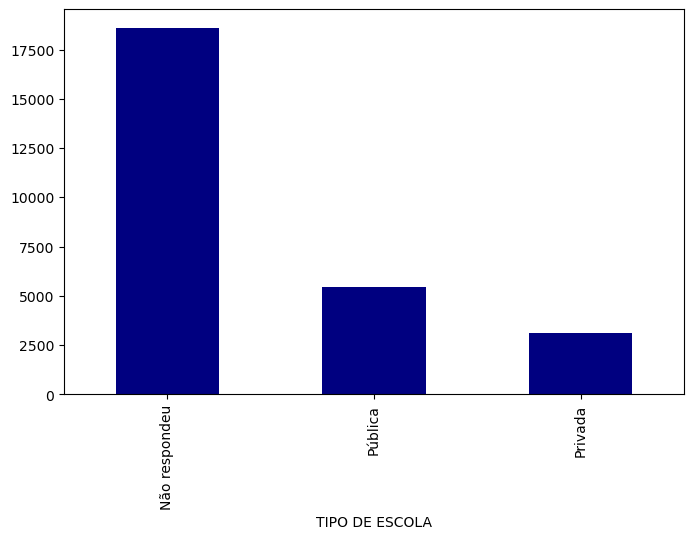

In [41]:
pcds.groupby(['TP_ESCOLA'])['DEFICIENCIAS'].sum().plot(kind = 'bar', color = 'navy', figsize= (8, 5))
ticks, labels = plt.xticks()
plt.xticks(ticks, labels=['Não respondeu', 'Pública', 'Privada'])
plt.xlabel('TIPO DE ESCOLA');

In [42]:
#percentual da distribuição de pcds por tipo de escola
#1=não respondeu, 2=pública, 3=privada

pcds.groupby('TP_ESCOLA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
TP_ESCOLA,
1,68.452425
2,20.097137
3,11.450438


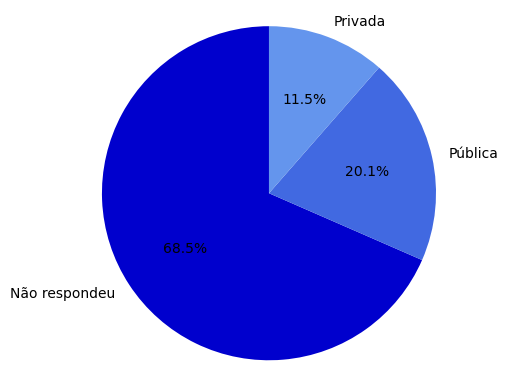

In [43]:
labels=['Não respondeu', 'Pública', 'Privada']
frequências=[68.45, 20.1, 11.45]

fig1, ax1=plt.subplots()

ax1.pie(frequências, labels=labels, autopct='%1.1f%%', startangle=90, colors=['mediumblue','royalblue', 'cornflowerblue'])
ax1.axis('equal')
plt.show()

In [44]:
#número de PCDs que declararam ter baixa visão

pcds.groupby('IN_BAIXA_VISAO')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_BAIXA_VISAO,
0,22401
1,4777


In [45]:
#Percentual de PCDs com baixa visão

pcds.groupby('IN_BAIXA_VISAO')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_BAIXA_VISAO,
0,82.423284
1,17.576716


In [46]:
#número de PCDs que declararam ter cegueira

pcds.groupby('IN_CEGUEIRA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_CEGUEIRA,
0,26619
1,559


In [47]:
#Percentual de PCDs com cegueira

pcds.groupby('IN_CEGUEIRA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_CEGUEIRA,
0,97.943189
1,2.056811


In [48]:
#número de PCDs que declararam ter surdez

pcds.groupby('IN_SURDEZ')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_SURDEZ,
0,25966
1,1212


In [49]:
#Percentual de PCDs com surdez

pcds.groupby('IN_SURDEZ')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_SURDEZ,
0,95.540511
1,4.459489


In [50]:
#número de PCDs que declararam ter deficiência auditiva

pcds.groupby('IN_DEFICIENCIA_AUDITIVA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_DEFICIENCIA_AUDITIVA,
0,25362
1,1816


In [51]:
#Percentual de PCDs com deficiência auditiva

pcds.groupby('IN_DEFICIENCIA_AUDITIVA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_DEFICIENCIA_AUDITIVA,
0,93.318125
1,6.681875


In [52]:
#número de PCDs que declararam ter surdo cegueira

pcds.groupby('IN_SURDO_CEGUEIRA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_SURDO_CEGUEIRA,
0,27148
1,30


In [53]:
#Percentual de PCDs com surdo cegueira

pcds.groupby('IN_SURDO_CEGUEIRA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_SURDO_CEGUEIRA,
0,99.889617
1,0.110383


In [54]:
#número de PCDs que declararam ter deficiência física

pcds.groupby('IN_DEFICIENCIA_FISICA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_DEFICIENCIA_FISICA,
0,21451
1,5727


In [55]:
#Percentual de PCDs com outras deficiência física

pcds.groupby('IN_DEFICIENCIA_FISICA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_DEFICIENCIA_FISICA,
0,78.927809
1,21.072191


In [56]:
#número de PCDs que declararam ter deficiência mental

pcds.groupby('IN_DEFICIENCIA_MENTAL')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_DEFICIENCIA_MENTAL,
0,24839
1,2339


In [57]:
#Percentual de PCDs com deficiência mental

pcds.groupby('IN_DEFICIENCIA_MENTAL')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_DEFICIENCIA_MENTAL,
0,91.393774
1,8.606226


In [58]:
#número de PCDs que declararam ter déficit de atenção

pcds.groupby('IN_DEFICIT_ATENCAO')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_DEFICIT_ATENCAO,
0,18459
1,8719


In [59]:
#Percentual de PCDs com déficit de atenção

pcds.groupby('IN_DEFICIT_ATENCAO')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_DEFICIT_ATENCAO,
0,67.918905
1,32.081095


In [60]:
#número de PCDs que declararam ter discalculia

pcds.groupby('IN_DISCALCULIA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_DISCALCULIA,
0,26417
1,761


In [61]:
#Percentual de PCDs com discalculia

pcds.groupby('IN_DISCALCULIA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_DISCALCULIA,
0,97.199941
1,2.800059


In [62]:
#número de PCDs que declararam ter dislexia

pcds.groupby('IN_DISLEXIA')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_DISLEXIA,
0,24885
1,2293


In [63]:
#Percentual de PCDs com dislexia

pcds.groupby('IN_DISLEXIA')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_DISLEXIA,
0,91.563029
1,8.436971


In [64]:
#número de PCDs que declararam ter autismo

pcds.groupby('IN_AUTISMO')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_AUTISMO,
0,25933
1,1245


In [65]:
#Percentual de PCDs com autismo

pcds.groupby('IN_AUTISMO')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_AUTISMO,
0,95.419089
1,4.580911


In [66]:
#número de PCDs que declararam ter visão monocular

pcds.groupby('IN_VISAO_MONOCULAR')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_VISAO_MONOCULAR,
0,26366
1,812


In [67]:
#Percentual de PCDs com visão monocular

pcds.groupby('IN_VISAO_MONOCULAR')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_VISAO_MONOCULAR,
0,97.012289
1,2.987711


In [68]:
#número de PCDs que declararam ter outros tipos de deficiências

pcds.groupby('IN_OUTRA_DEF')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
IN_OUTRA_DEF,
0,24248
1,2930


In [69]:
#Percentual de PCDs com outras deficiências

pcds.groupby('IN_OUTRA_DEF')[['DEFICIENCIAS']].sum()/27178*100

,DEFICIENCIAS
IN_OUTRA_DEF,
0,89.219221
1,10.780779


In [70]:
# filtrando notas acima de 0 (zero)
pcds2 = pcds.loc[(pcds['NU_NOTA_CN'] > 0)
                  & (pcds['NU_NOTA_CH'] > 0)
                  & (pcds['NU_NOTA_LC'] > 0)
                  & (pcds['NU_NOTA_MT'] > 0)
                  & (pcds['NU_NOTA_REDACAO']), :]
print(pcds2)

         IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  \
0                     0            0          0                        0   
1                     0            0          0                        0   
2                     0            0          0                        0   
5                     0            0          0                        0   
6                     0            0          0                        0   
...                 ...          ...        ...                      ...   
5095261               0            0          0                        0   
5095262               0            0          0                        0   
5095263               0            0          0                        0   
5095268               0            0          0                        0   
5095269               0            0          0                        0   

         IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  \
0          

In [71]:
print(pcds2['DEFICIENCIAS'].value_counts())

0    3570620
1      20986
2       1678
3        249
4         46
5          6
7          1
Name: DEFICIENCIAS, dtype: int64


In [72]:
#distribuição das notas de Ciências da Natureza

pcds2.groupby('NU_NOTA_CN')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
NU_NOTA_CN,
327.9,2
328.0,0
328.1,0
328.2,0
328.3,0
...,...
843.2,0
847.8,0
849.7,0


In [73]:
#distribuição das notas de Ciências Humanas

pcds2.groupby('NU_NOTA_CH')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
NU_NOTA_CH,
315.9,7
316.0,0
316.1,0
316.2,0
316.3,0
...,...
812.7,0
812.8,0
820.4,0


In [74]:
#distribuição das notas de Linguagem e Códigos

pcds2.groupby('NU_NOTA_LC')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
NU_NOTA_LC,
322.0,0
322.1,0
322.2,1
322.3,0
322.4,0
...,...
772.3,0
784.9,0
785.1,0


In [75]:
#distribuição das notas de Matemática

pcds2.groupby('NU_NOTA_MT')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
NU_NOTA_MT,
359.0,7
359.1,9
359.2,4
359.3,4
359.4,3
...,...
976.5,0
984.2,4
984.7,0


In [76]:
#distribuição das notas de Redação

pcds2.groupby('NU_NOTA_REDACAO')[['DEFICIENCIAS']].sum()

,DEFICIENCIAS
NU_NOTA_REDACAO,
40.0,10
60.0,17
80.0,23
100.0,17
120.0,29
140.0,36
160.0,58
180.0,63
200.0,109


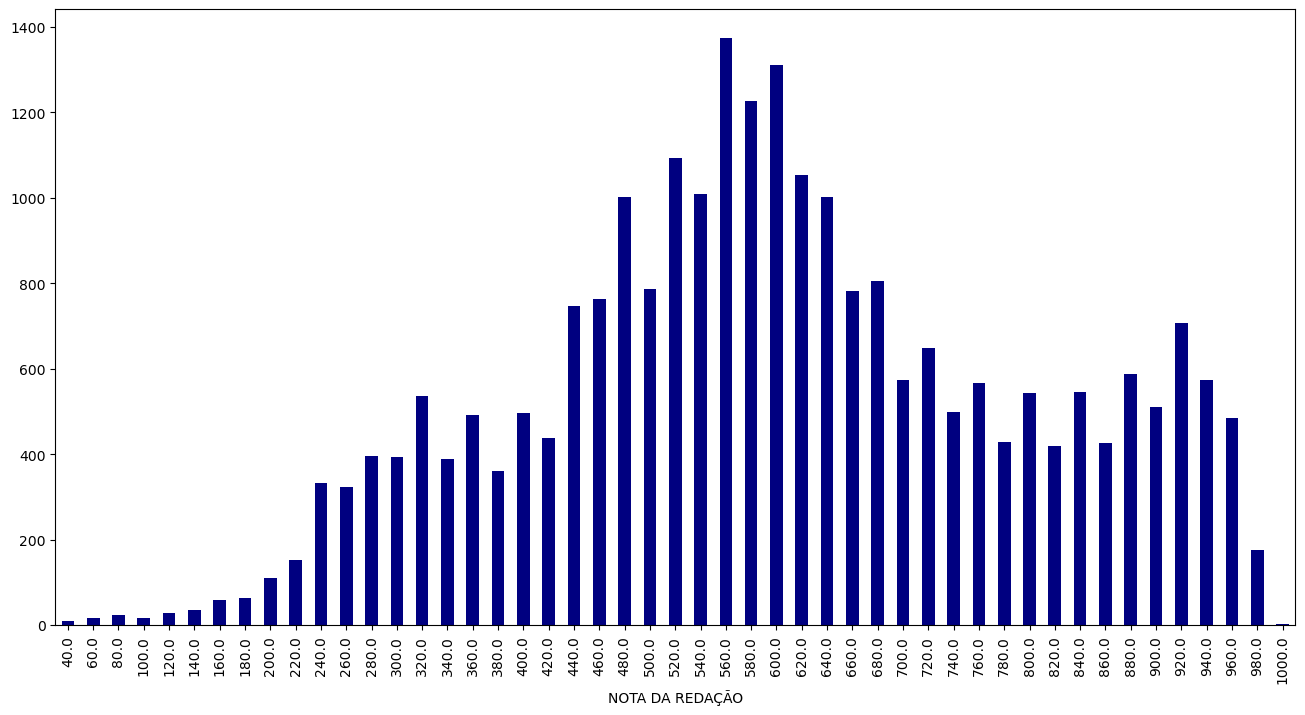

In [77]:
pcds2.groupby(['NU_NOTA_REDACAO'])['DEFICIENCIAS'].sum().plot(kind = 'bar', figsize= (16, 8), color='navy')
plt.xlabel('NOTA DA REDAÇÃO');

In [78]:
# reshaping dataframe(wide to long)
defi = pd.melt(frame = pcds2, id_vars = ['TP_COR_RACA', 'TP_SEXO_2', 'TP_ESCOLA','DEFICIENCIAS', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_AUTISMO'],
               value_vars = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'],
               var_name = 'Matérias', value_name = 'Notas')

print(defi)

          TP_COR_RACA  TP_SEXO_2  TP_ESCOLA  DEFICIENCIAS  IN_CEGUEIRA  \
0                   3          0          1             0            0   
1                   3          1          1             0            0   
2                   1          1          3             0            0   
3                   1          0          1             0            0   
4                   3          1          1             0            0   
...               ...        ...        ...           ...          ...   
17967925            2          1          1             0            0   
17967926            2          1          1             0            0   
17967927            3          0          1             2            0   
17967928            1          0          1             1            0   
17967929            2          1          1             1            0   

          IN_SURDEZ  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_AUTISMO  \
0                 0           

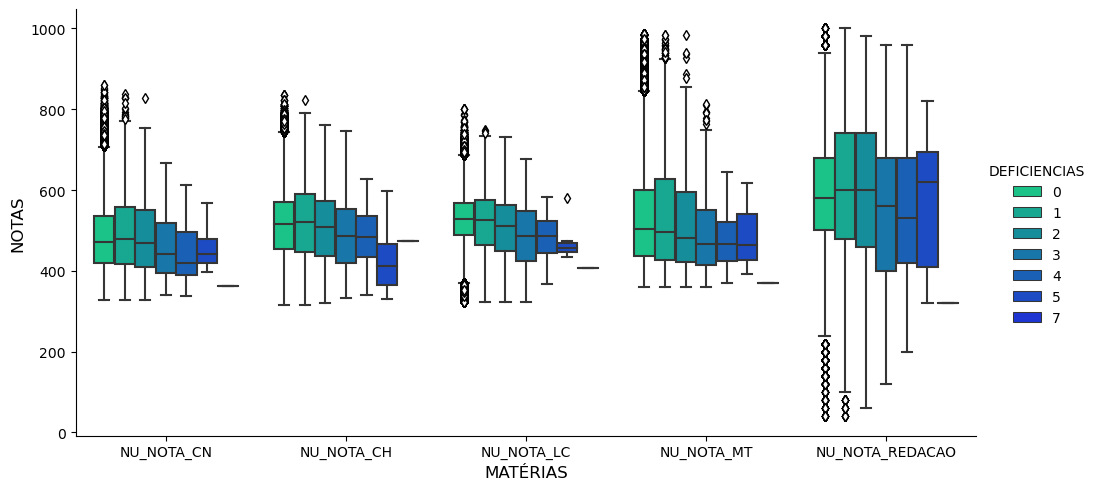

In [79]:
#notas por deficiência
sns.catplot(data = defi, x = 'Matérias', y = 'Notas', hue = 'DEFICIENCIAS', kind = 'box',
           flierprops = {'marker': 'd', 'markerfacecolor': 'w', 'markeredgecolor': 'k'}, aspect = 2, palette='winter_r')
plt.xlabel('MATÉRIAS', fontsize=12)
plt.ylabel('NOTAS', fontsize=12)
plt.show()

In [80]:
# mediana das notas por deficiência
for mat in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(mat, '\n', pcds2.groupby('DEFICIENCIAS')[mat].median().round(2), '\n')

NU_NOTA_CN 
 DEFICIENCIAS
0    472.40
1    478.80
2    469.40
3    440.50
4    419.85
5    442.05
7    362.90
Name: NU_NOTA_CN, dtype: float64 

NU_NOTA_CH 
 DEFICIENCIAS
0    515.80
1    521.85
2    509.75
3    485.10
4    484.75
5    411.00
7    472.80
Name: NU_NOTA_CH, dtype: float64 

NU_NOTA_LC 
 DEFICIENCIAS
0    529.40
1    524.90
2    510.80
3    486.40
4    485.85
5    455.95
7    408.00
Name: NU_NOTA_LC, dtype: float64 

NU_NOTA_MT 
 DEFICIENCIAS
0    504.00
1    497.30
2    482.35
3    467.60
4    465.80
5    465.00
7    368.80
Name: NU_NOTA_MT, dtype: float64 

NU_NOTA_REDACAO 
 DEFICIENCIAS
0    580.0
1    600.0
2    600.0
3    560.0
4    530.0
5    620.0
7    320.0
Name: NU_NOTA_REDACAO, dtype: float64 



In [81]:
print(pcds2['DEFICIENCIAS'].value_counts())

0    3570620
1      20986
2       1678
3        249
4         46
5          6
7          1
Name: DEFICIENCIAS, dtype: int64


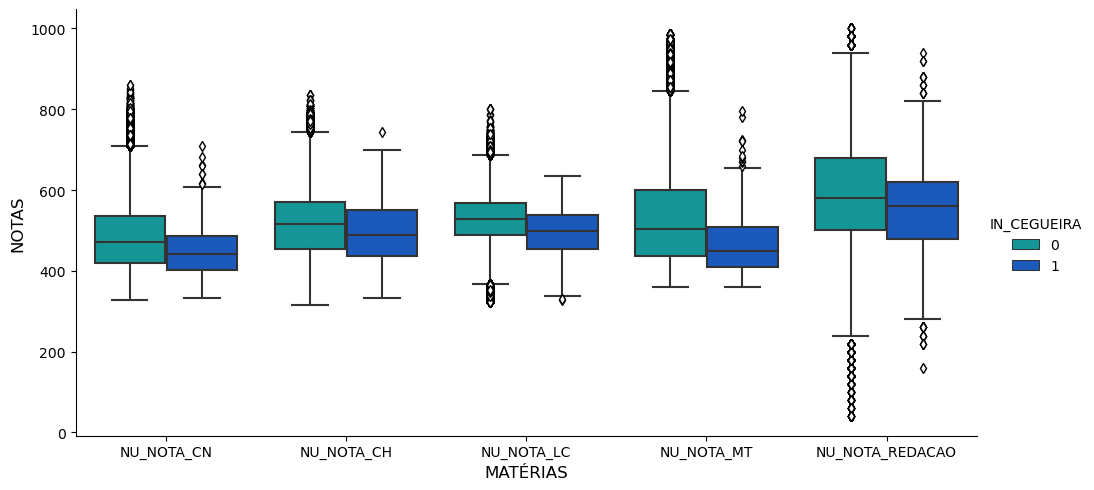

In [82]:
#notas por deficiência - cegueira
sns.catplot(data = defi, x = 'Matérias', y = 'Notas', hue = 'IN_CEGUEIRA', kind = 'box',
           flierprops = {'marker': 'd', 'markerfacecolor': 'w', 'markeredgecolor': 'k'}, aspect = 2, palette='winter_r')
plt.xlabel('MATÉRIAS', fontsize=12)
plt.ylabel('NOTAS', fontsize=12)
plt.show()

In [83]:
# mediana das notas por deficiência - cegueira
for mat in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(mat, '\n', pcds2.groupby('IN_CEGUEIRA')[mat].median().round(2), '\n')

NU_NOTA_CN 
 IN_CEGUEIRA
0    472.50
1    441.35
Name: NU_NOTA_CN, dtype: float64 

NU_NOTA_CH 
 IN_CEGUEIRA
0    515.80
1    488.05
Name: NU_NOTA_CH, dtype: float64 

NU_NOTA_LC 
 IN_CEGUEIRA
0    529.4
1    497.4
Name: NU_NOTA_LC, dtype: float64 

NU_NOTA_MT 
 IN_CEGUEIRA
0    504.00
1    448.85
Name: NU_NOTA_MT, dtype: float64 

NU_NOTA_REDACAO 
 IN_CEGUEIRA
0    580.0
1    560.0
Name: NU_NOTA_REDACAO, dtype: float64 



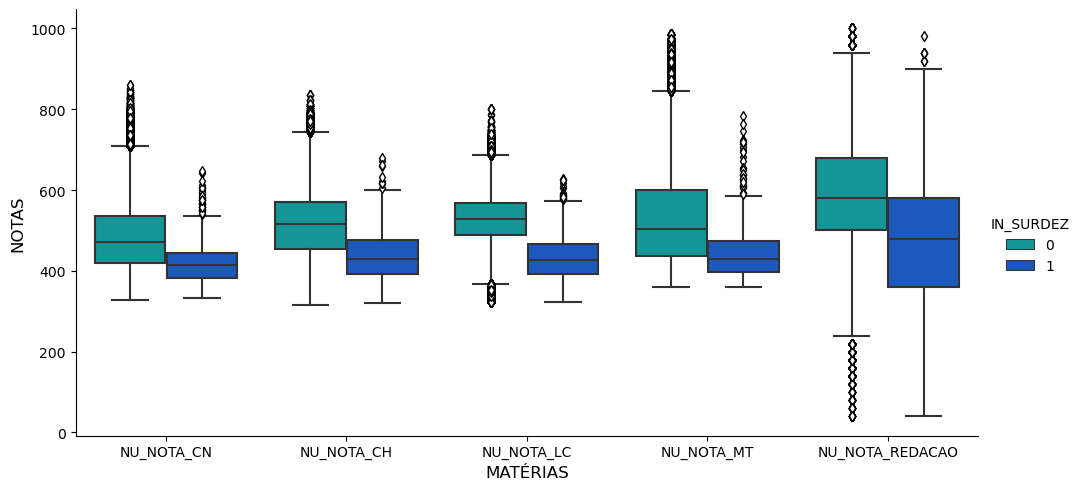

In [84]:
#notas por deficiência - surdez
sns.catplot(data = defi, x = 'Matérias', y = 'Notas', hue = 'IN_SURDEZ', kind = 'box',
           flierprops = {'marker': 'd', 'markerfacecolor': 'w', 'markeredgecolor': 'k'}, aspect = 2, palette='winter_r')
plt.xlabel('MATÉRIAS', fontsize=12)
plt.ylabel('NOTAS', fontsize=12)
plt.show()

In [85]:
# mediana das notas por deficiência - surdez
for mat in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(mat, '\n', pcds2.groupby('IN_SURDEZ')[mat].median().round(2), '\n')

NU_NOTA_CN 
 IN_SURDEZ
0    472.5
1    413.9
Name: NU_NOTA_CN, dtype: float64 

NU_NOTA_CH 
 IN_SURDEZ
0    515.8
1    430.3
Name: NU_NOTA_CH, dtype: float64 

NU_NOTA_LC 
 IN_SURDEZ
0    529.4
1    427.5
Name: NU_NOTA_LC, dtype: float64 

NU_NOTA_MT 
 IN_SURDEZ
0    504.00
1    430.15
Name: NU_NOTA_MT, dtype: float64 

NU_NOTA_REDACAO 
 IN_SURDEZ
0    580.0
1    480.0
Name: NU_NOTA_REDACAO, dtype: float64 



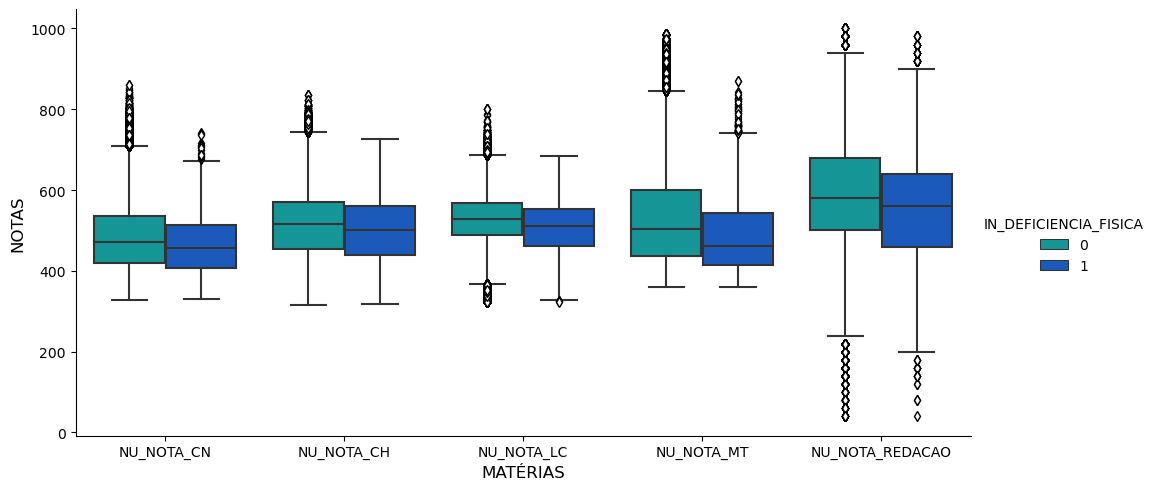

In [86]:
#notas por deficiência - deficiência física
sns.catplot(data = defi, x = 'Matérias', y = 'Notas', hue = 'IN_DEFICIENCIA_FISICA', kind = 'box',
           flierprops = {'marker': 'd', 'markerfacecolor': 'w', 'markeredgecolor': 'k'}, aspect = 2, palette='winter_r')
plt.xlabel('MATÉRIAS', fontsize=12)
plt.ylabel('NOTAS', fontsize=12)
plt.show()

In [87]:
# mediana das notas por deficiência - deficiência física
for mat in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(mat, '\n', pcds2.groupby('IN_DEFICIENCIA_FISICA')[mat].median().round(2), '\n')

NU_NOTA_CN 
 IN_DEFICIENCIA_FISICA
0    472.5
1    455.5
Name: NU_NOTA_CN, dtype: float64 

NU_NOTA_CH 
 IN_DEFICIENCIA_FISICA
0    515.8
1    502.2
Name: NU_NOTA_CH, dtype: float64 

NU_NOTA_LC 
 IN_DEFICIENCIA_FISICA
0    529.4
1    510.9
Name: NU_NOTA_LC, dtype: float64 

NU_NOTA_MT 
 IN_DEFICIENCIA_FISICA
0    504.0
1    462.0
Name: NU_NOTA_MT, dtype: float64 

NU_NOTA_REDACAO 
 IN_DEFICIENCIA_FISICA
0    580.0
1    560.0
Name: NU_NOTA_REDACAO, dtype: float64 



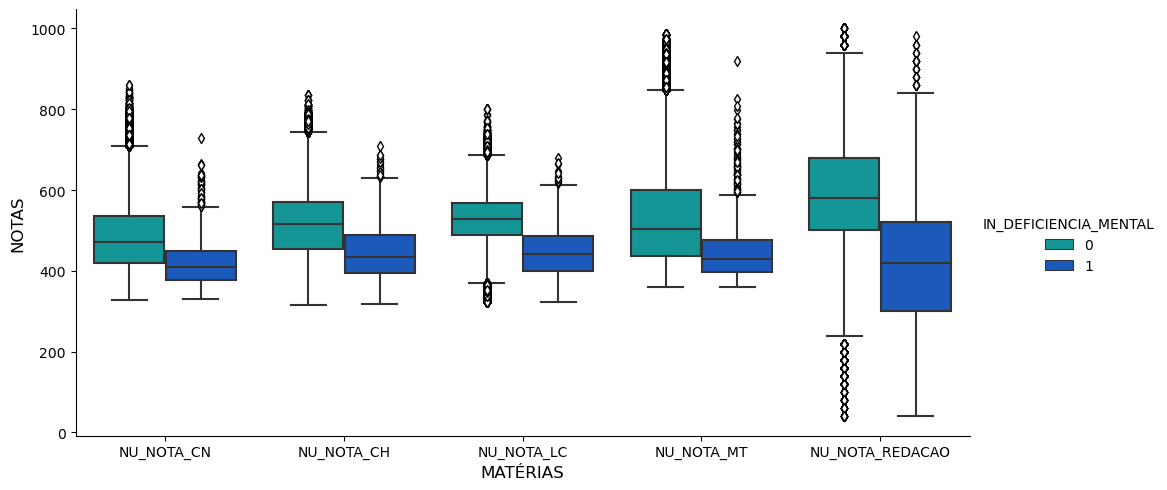

In [88]:
#notas por deficiência - deficiência mental
sns.catplot(data = defi, x = 'Matérias', y = 'Notas', hue = 'IN_DEFICIENCIA_MENTAL', kind = 'box',
           flierprops = {'marker': 'd', 'markerfacecolor': 'w', 'markeredgecolor': 'k'}, aspect = 2, palette='winter_r')
plt.xlabel('MATÉRIAS', fontsize=12)
plt.ylabel('NOTAS', fontsize=12)
plt.show()

In [89]:
# mediana das notas por deficiência - deficiência mental
for mat in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(mat, '\n', pcds2.groupby('IN_DEFICIENCIA_MENTAL')[mat].median().round(2), '\n')

NU_NOTA_CN 
 IN_DEFICIENCIA_MENTAL
0    472.5
1    410.6
Name: NU_NOTA_CN, dtype: float64 

NU_NOTA_CH 
 IN_DEFICIENCIA_MENTAL
0    515.8
1    434.0
Name: NU_NOTA_CH, dtype: float64 

NU_NOTA_LC 
 IN_DEFICIENCIA_MENTAL
0    529.4
1    441.3
Name: NU_NOTA_LC, dtype: float64 

NU_NOTA_MT 
 IN_DEFICIENCIA_MENTAL
0    504.0
1    429.3
Name: NU_NOTA_MT, dtype: float64 

NU_NOTA_REDACAO 
 IN_DEFICIENCIA_MENTAL
0    580.0
1    420.0
Name: NU_NOTA_REDACAO, dtype: float64 



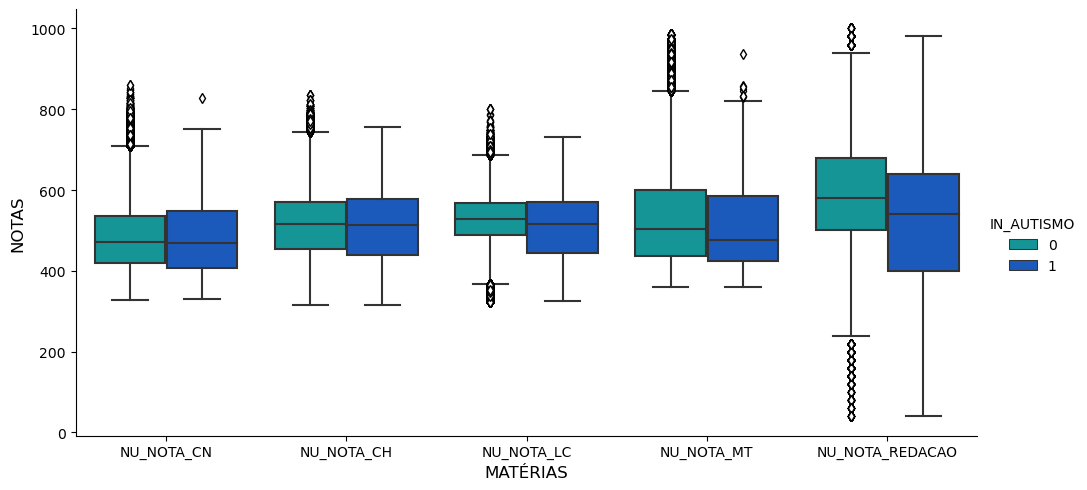

In [90]:
#notas por deficiência - autismo
sns.catplot(data = defi, x = 'Matérias', y = 'Notas', hue = 'IN_AUTISMO', kind = 'box',
           flierprops = {'marker': 'd', 'markerfacecolor': 'w', 'markeredgecolor': 'k'}, aspect = 2, palette='winter_r')
plt.xlabel('MATÉRIAS', fontsize=12)
plt.ylabel('NOTAS', fontsize=12)
plt.show()

In [91]:
# mediana das notas por deficiência - autismo
for mat in ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    print(mat, '\n', pcds2.groupby('IN_AUTISMO')[mat].median().round(2), '\n')

NU_NOTA_CN 
 IN_AUTISMO
0    472.5
1    468.9
Name: NU_NOTA_CN, dtype: float64 

NU_NOTA_CH 
 IN_AUTISMO
0    515.8
1    513.0
Name: NU_NOTA_CH, dtype: float64 

NU_NOTA_LC 
 IN_AUTISMO
0    529.4
1    515.7
Name: NU_NOTA_LC, dtype: float64 

NU_NOTA_MT 
 IN_AUTISMO
0    504.0
1    476.5
Name: NU_NOTA_MT, dtype: float64 

NU_NOTA_REDACAO 
 IN_AUTISMO
0    580.0
1    540.0
Name: NU_NOTA_REDACAO, dtype: float64 



In [92]:
pcds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593586 entries, 0 to 5095269
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IN_BAIXA_VISAO           int64  
 1   IN_CEGUEIRA              int64  
 2   IN_SURDEZ                int64  
 3   IN_DEFICIENCIA_AUDITIVA  int64  
 4   IN_SURDO_CEGUEIRA        int64  
 5   IN_DEFICIENCIA_FISICA    int64  
 6   IN_DEFICIENCIA_MENTAL    int64  
 7   IN_DEFICIT_ATENCAO       int64  
 8   IN_DISLEXIA              int64  
 9   IN_DISCALCULIA           int64  
 10  IN_AUTISMO               int64  
 11  IN_VISAO_MONOCULAR       int64  
 12  IN_OUTRA_DEF             int64  
 13  TP_SEXO                  object 
 14  TP_SEXO_2                int32  
 15  TP_COR_RACA              int64  
 16  NU_IDADE                 int64  
 17  SG_UF_RESIDENCIA         object 
 18  TP_ESCOLA                int64  
 19  NU_NOTA_CN               float64
 20  NU_NOTA_CH               float64
 21  NU_NOTA_

In [93]:
pcds3=pcds2.drop(['IN_BAIXA_VISAO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'TP_SEXO', 'NU_IDADE'], axis=1)

In [94]:
pcds3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593586 entries, 0 to 5095269
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   IN_CEGUEIRA            int64  
 1   IN_SURDEZ              int64  
 2   IN_DEFICIENCIA_FISICA  int64  
 3   IN_DEFICIENCIA_MENTAL  int64  
 4   IN_AUTISMO             int64  
 5   TP_SEXO_2              int32  
 6   TP_COR_RACA            int64  
 7   SG_UF_RESIDENCIA       object 
 8   TP_ESCOLA              int64  
 9   NU_NOTA_CN             float64
 10  NU_NOTA_CH             float64
 11  NU_NOTA_LC             float64
 12  NU_NOTA_MT             float64
 13  NU_NOTA_REDACAO        float64
 14  DEFICIENCIAS           int64  
dtypes: float64(5), int32(1), int64(8), object(1)
memory usage: 425.0+ MB


In [95]:
# separandp a base em treino e teste
X_train, X_test, y_train, y_test = \
    train_test_split(pcds3.iloc[:, 1:-1].drop(columns = ['SG_UF_RESIDENCIA']),
        pcds3['DEFICIENCIAS'],
        test_size = 0.20,
        random_state = 0,
        shuffle = True)

In [96]:
# knn
n = pcds3['DEFICIENCIAS'].nunique() # 6
knn = KNeighborsClassifier(n_neighbors = n, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test) ) # acurácia do modelo

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9935871927515382


In [97]:
pred_prob = knn.predict_proba(X_train)
ind = np.argmax(a = pred_prob, axis = 1)
print(ind)

[0 0 0 ... 0 0 0]


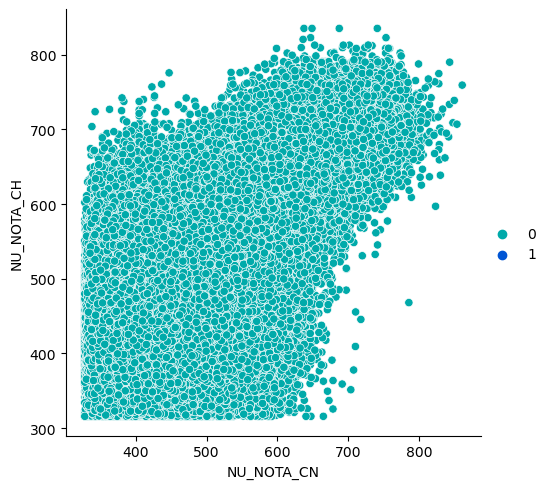

In [98]:
sns.relplot(data = X_train, x = 'NU_NOTA_CN', y = 'NU_NOTA_CH', hue = ind, kind = 'scatter', palette='winter_r')
plt.show()

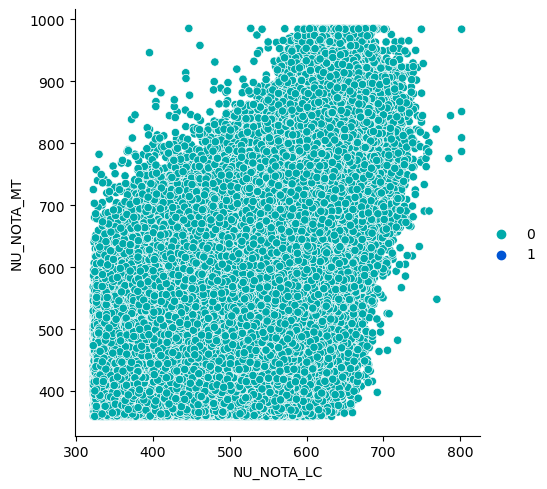

In [99]:
sns.relplot(data = X_train, x = 'NU_NOTA_LC', y = 'NU_NOTA_MT', hue = ind, kind = 'scatter', palette='winter_r')
plt.show()

In [100]:
pcds3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593586 entries, 0 to 5095269
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   IN_CEGUEIRA            int64  
 1   IN_SURDEZ              int64  
 2   IN_DEFICIENCIA_FISICA  int64  
 3   IN_DEFICIENCIA_MENTAL  int64  
 4   IN_AUTISMO             int64  
 5   TP_SEXO_2              int32  
 6   TP_COR_RACA            int64  
 7   SG_UF_RESIDENCIA       object 
 8   TP_ESCOLA              int64  
 9   NU_NOTA_CN             float64
 10  NU_NOTA_CH             float64
 11  NU_NOTA_LC             float64
 12  NU_NOTA_MT             float64
 13  NU_NOTA_REDACAO        float64
 14  DEFICIENCIAS           int64  
dtypes: float64(5), int32(1), int64(8), object(1)
memory usage: 425.0+ MB


In [101]:
# matriz de correlação
corr=pcds3.iloc[:,np.r_[0:13]].drop(columns='SG_UF_RESIDENCIA').corr()
corr

,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_AUTISMO,TP_SEXO_2,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
IN_CEGUEIRA,1.000000,-0.000184,0.004653,0.000990,0.001320,-0.003436,0.000099,-0.001416,-0.004697,-0.003297,-0.006033,-0.006394
IN_SURDEZ,-0.000184,1.000000,0.001926,0.000660,-0.000237,-0.002453,-0.000441,0.000210,-0.012020,-0.014290,-0.023231,-0.011347
IN_DEFICIENCIA_FISICA,0.004653,0.001926,1.000000,0.050705,0.001917,-0.008313,-0.000011,-0.007260,-0.007439,-0.005297,-0.011319,-0.012423
IN_DEFICIENCIA_MENTAL,0.000990,0.000660,0.050705,1.000000,0.036739,-0.006362,0.000492,0.003150,-0.014253,-0.015535,-0.024310,-0.013219
IN_AUTISMO,0.001320,-0.000237,0.001917,0.036739,1.000000,-0.012642,-0.005462,0.006764,-0.000243,-0.000227,-0.004444,-0.001707
TP_SEXO_2,-0.003436,-0.002453,-0.008313,-0.006362,-0.012642,1.000000,0.023756,-0.025344,-0.129256,-0.089711,-0.023149,-0.193819
TP_COR_RACA,0.000099,-0.000441,-0.000011,0.000492,-0.005462,0.023756,1.000000,-0.069876,-0.190785,-0.192236,-0.198368,-0.196738
TP_ESCOLA,-0.001416,0.000210,-0.007260,0.003150,0.006764,-0.025344,-0.069876,1.000000,0.055098,0.046075,0.041116,0.091039
NU_NOTA_CN,-0.004697,-0.012020,-0.007439,-0.014253,-0.000243,-0.129256,-0.190785,0.055098,1.000000,0.676929,0.648626,0.647775
NU_NOTA_CH,-0.003297,-0.014290,-0.005297,-0.015535,-0.000227,-0.089711,-0.192236,0.046075,0.676929,1.000000,0.744069,0.616046


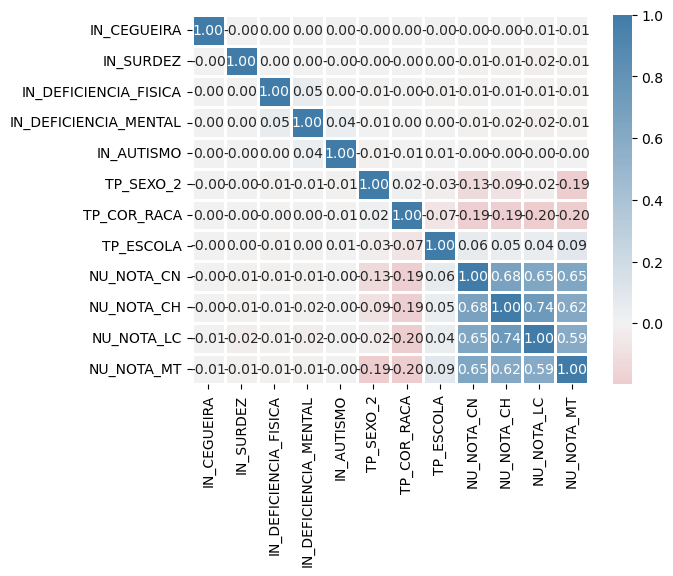

In [102]:
# mapa de calor
sns.heatmap(data = corr, center = 0, linewidths = 1, annot = True, fmt = ".2f",
            cmap = sns.diverging_palette(h_neg = 10,h_pos = 240,as_cmap = True) )
plt.show()

In [103]:
# retirando da base as pessoas sem deficiência
pcds4=pcds3[pcds3["DEFICIENCIAS"] > 0].drop(columns='SG_UF_RESIDENCIA')
pcds4

,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_AUTISMO,TP_SEXO_2,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,DEFICIENCIAS
57,0,0,0,0,0,0,2,2,423.2,343.9,453.9,456.0,580.0,1
185,0,0,1,0,0,0,3,1,516.6,589.9,580.8,533.4,640.0,1
434,0,0,1,0,0,0,3,1,404.4,489.6,428.0,417.2,260.0,1
667,0,0,0,0,1,1,3,1,490.4,510.3,548.2,544.8,580.0,1
755,0,0,1,0,0,0,3,1,371.0,406.4,501.7,422.5,240.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078421,0,0,0,0,0,0,3,1,540.3,576.9,555.2,538.0,720.0,2
5078423,0,0,0,0,0,1,1,1,512.4,594.5,540.6,648.2,960.0,2
5095263,0,0,1,0,1,0,3,1,450.4,469.0,515.7,552.0,580.0,2
5095268,0,0,0,0,0,0,1,1,458.8,380.6,493.1,396.7,800.0,1


In [104]:
defi2 = pd.melt(frame = pcds4.iloc[:,7:], id_vars = ['TP_ESCOLA', 'DEFICIENCIAS'],
               value_vars = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'],
               var_name = 'Matérias', value_name = 'Notas')
defi2['TP_ESCOLA']=defi2['TP_ESCOLA'].map({1:'Não informado', 2:'Pública', 3:'Privada'})
print(defi2)

            TP_ESCOLA  DEFICIENCIAS         Matérias  Notas
0             Pública             1       NU_NOTA_CN  423.2
1       Não informado             1       NU_NOTA_CN  516.6
2       Não informado             1       NU_NOTA_CN  404.4
3       Não informado             1       NU_NOTA_CN  490.4
4       Não informado             2       NU_NOTA_CN  371.0
...               ...           ...              ...    ...
114825  Não informado             2  NU_NOTA_REDACAO  720.0
114826  Não informado             2  NU_NOTA_REDACAO  960.0
114827  Não informado             2  NU_NOTA_REDACAO  580.0
114828  Não informado             1  NU_NOTA_REDACAO  800.0
114829  Não informado             1  NU_NOTA_REDACAO  280.0

[114830 rows x 4 columns]


In [106]:
# PCA
pipe = Pipeline(steps = [('scaler', StandardScaler() ),
                         ('reducer', PCA(n_components = 2)) ])
pc=pipe.fit_transform(pcds4)

In [107]:
pipe['reducer'].components_.T.round(2)

array([[-0.04, -0.09],
       [-0.11, -0.12],
       [-0.09, -0.24],
       [-0.14,  0.41],
       [-0.02,  0.42],
       [ 0.01, -0.28],
       [-0.12, -0.24],
       [ 0.02,  0.39],
       [ 0.44,  0.03],
       [ 0.45,  0.01],
       [ 0.44, -0.03],
       [ 0.43,  0.06],
       [ 0.41, -0.03],
       [-0.04,  0.52]])

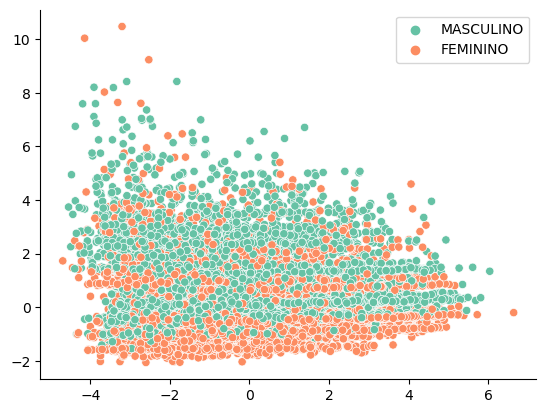

In [108]:
# PCA - sexo
ax = sns.scatterplot(data=pcds4, x=pc[:,0], y=pc[:,1], hue='TP_SEXO_2', palette='Set2')
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=['MASCULINO', 'FEMININO'])
sns.despine()
plt.show()


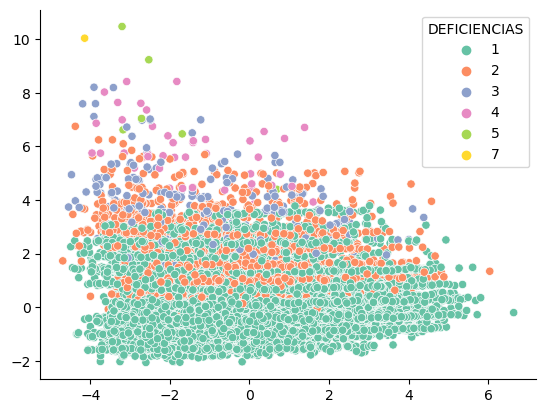

In [109]:
# PCA - quantidade de deficiências
ax = sns.scatterplot(data=pcds4, x=pc[:,0], y=pc[:,1], hue='DEFICIENCIAS', palette='Set2')
sns.despine()
plt.show()

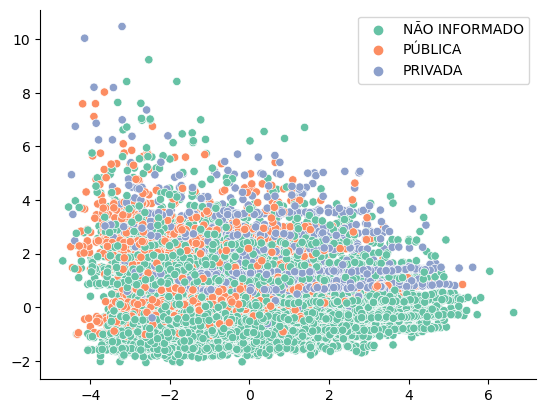

In [110]:
# PCA - tipo de escola
ax = sns.scatterplot(data=pcds4, x=pc[:,0], y=pc[:,1], hue='TP_ESCOLA', palette='Set2')
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=['NÃO INFORMADO', 'PÚBLICA', 'PRIVADA'])
sns.despine()
plt.show()

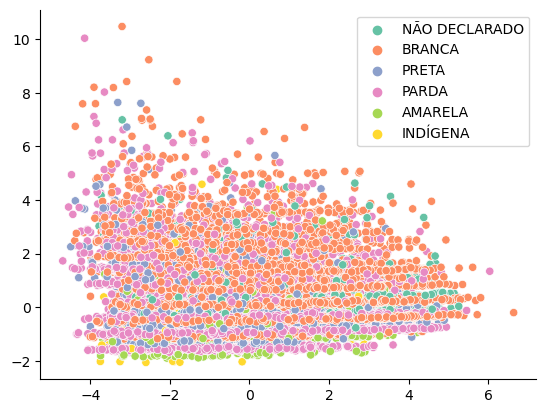

In [111]:
# PCA - raça
ax = sns.scatterplot(data=pcds4, x=pc[:,0], y=pc[:,1], hue='TP_COR_RACA', palette='Set2')
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=['NÃO DECLARADO', 'BRANCA', 'PRETA', 'PARDA', 'AMARELA', 'INDÍGENA'])
sns.despine()
plt.show()


In [112]:
pipe = Pipeline([
        ('scaler', StandardScaler() ),
        ('reducer', PCA())])
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('reducer', PCA())])

In [113]:
pipe['reducer'].explained_variance_ratio_

array([0.29463088, 0.08970043, 0.08620636, 0.08478821, 0.08337568,
       0.08267656, 0.07830141, 0.07631188, 0.041025  , 0.03417942,
       0.02786317, 0.020941  ])

C:\Users\Maria Cláudia\AppData\Local\Temp\ipykernel_1748\4288526373.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1,13), pipe['reducer'].explained_variance_ratio_, 'ro-', color='lightseagreen')


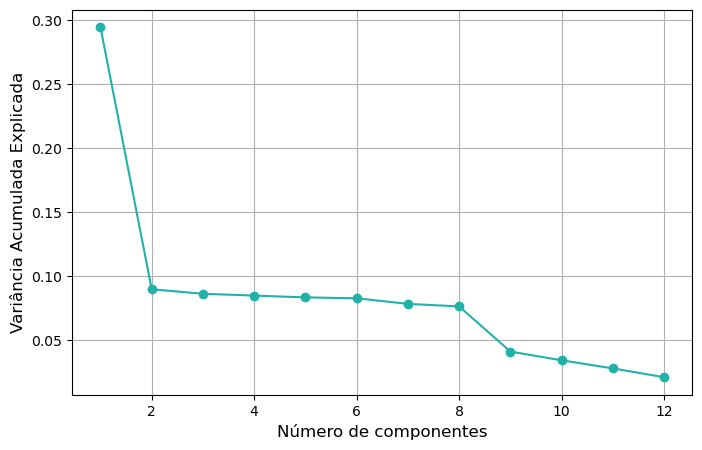

In [114]:
# Gráfico de cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1,13), pipe['reducer'].explained_variance_ratio_, 'ro-', color='lightseagreen')
plt.xlabel('Número de componentes', fontsize=12)
plt.ylabel('Variância Acumulada Explicada', fontsize=12);
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.grid(True)
plt.show(True)

In [115]:
# t-SNE
tsne = TSNE(n_components = 2, learning_rate = 10, n_jobs = -1)
tsne_features = tsne.fit_transform(pcds4.select_dtypes(include='number'))

C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [116]:
pcds4=pcds4.assign(TP_SEXO=pcds4['TP_SEXO_2'].map({0:'MASCULINO', 1:'FEMININO'}),
                  TP_COR_RACA_2=pcds4['TP_COR_RACA'].map({0:'NÃO DECLARADO', 1:'BRANCA', 2:'PRETA', 3:'PARDA', 4:'AMARELA', 5:'INDÍGENA'}),
                  TP_ESCOLA_2=pcds4['TP_ESCOLA'].map({1:'NÃO INFORMADO', 2:'PÚBLICA', 3:'PRIVADA'}))

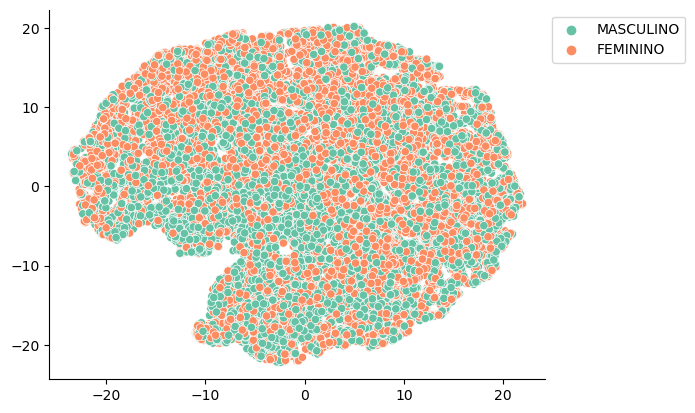

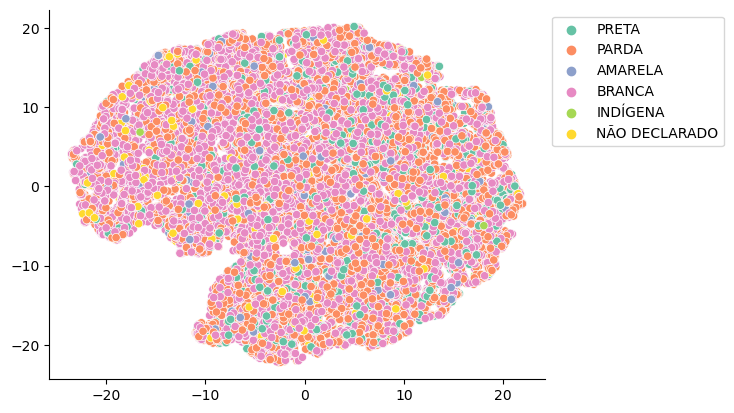

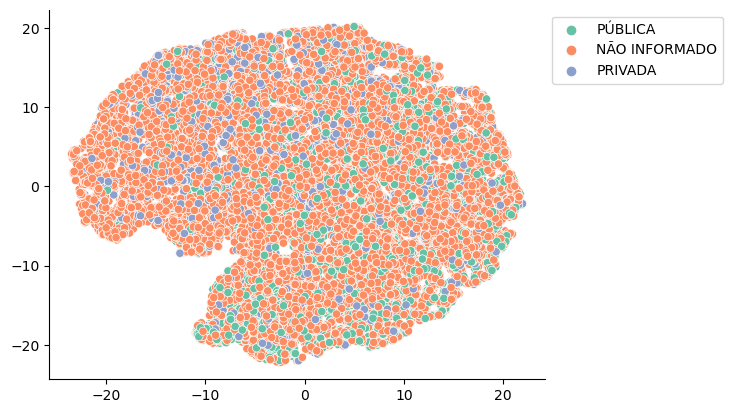

In [117]:
# t-SNE - sexo, raça e tipo de escola
for cat in pcds4.select_dtypes(exclude = 'number').columns.tolist():
    
    sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=cat, data=pcds4, palette='Set2')
    plt.legend(bbox_to_anchor=(1,1))
    sns.despine()
    plt.show()

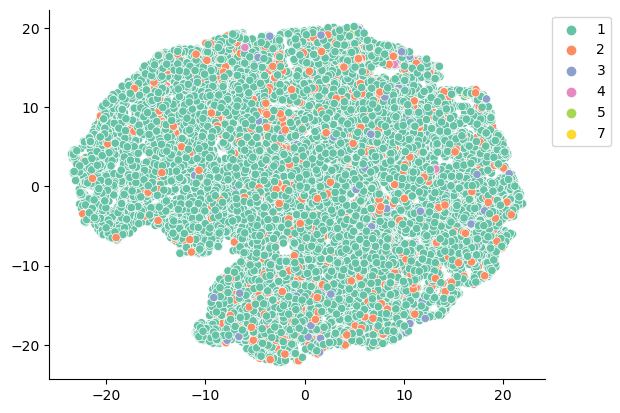

In [118]:
# t-SNE - quantidade de deficiências
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue="DEFICIENCIAS", data=pcds4, palette="Set2")
plt.legend(bbox_to_anchor=(1,1))
sns.despine()
plt.show()